In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


In [2]:
dataset = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
dataset.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


# DATA CLEANING

    * counting each values in the column

In [5]:
dataset['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [6]:
dataset['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

    * Drop some unwanted columns

In [7]:
dataset.drop(['area_type','availability','society','balcony'],axis=1,inplace=True)

In [8]:
dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
dataset.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

    * Checking for NaN values

In [10]:
print(dataset.isnull().sum())

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64


#### If we want to fill the null value we can use the <span style="color: yellow;">_datsaet.fillna()_</span> method if we want to fill with the specific values such as mean, median the we can use <span style="color: yellow;">_dataset.fillna(dataset.mean())_</span> or <span style="color: yellow;">_dataset.fillna(dataset.meian())_</span> and other specific values such as 0 then <span style="color: yellow;">_dataset.fillna(0)_</span> and using forward and backward filling <span style="color: yellow;">_dataset.ffill()_</span> for forward filling and <span style="color: yellow;">_dataset.bfill()_</span> for backward filling or else we can simply drop the Null rows using <span style="color: yellow;">_dataset.dropna()_</span>

In [11]:
## remove the null value

df2 = dataset.dropna()

In [12]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df2.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [14]:
## make size column more convenient to read by creating new column name BHK 

##Lambda functions are often used in situations where a small, short-lived function is needed,
# and defining a full function using the def keyword might be overly verbose.
# They are commonly used with functions like map, filter, and apply in Python.

df2['BHK']=df2['size'].apply(lambda x: x.split(' ')[0]).astype(int)

C:\Users\rsibr\AppData\Local\Temp\ipykernel_10856\4030866578.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x: x.split(' ')[0]).astype(int)


In [15]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
## Find the unique values
df2['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [17]:
## Access the dataset which has the BHK value greater than 20
df2[df2.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df2['total_sqft'].unique() ## There are ranges in the total_sqft columns

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(X):
    try:
        float(X)
        #float(df2.iloc[1,2])
    except:
        return False
        #float(df2.iloc[30,2])
    return True



df2[~df2['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
## Handle the ranges and NaN values

def convert_range_to_num(X):
    tokens = X.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(X)
    except:
        return None
    
df2['total_sqft'] = df2['total_sqft'].apply(convert_range_to_num)

C:\Users\rsibr\AppData\Local\Temp\ipykernel_10856\597009050.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df2['total_sqft'].apply(convert_range_to_num)


In [21]:
df2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [22]:
## drop NaN values
df3=df2.dropna()

In [23]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

# FEATURE ENGINEERING

#### Feature engineering is the process of creating new features or modifying existing ones in a dataset to improve the performance of a machine learning model. It involves transforming raw data into a format that better represents the underlying problem and enhances the model's ability to make accurate predictions.

In [24]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
## Creating new column name price_per_sqft to store the price

df3['price_per_sqft'] = (df3['price'] * 100000 )/ df3['total_sqft']

C:\Users\rsibr\AppData\Local\Temp\ipykernel_10856\1744370180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['price_per_sqft'] = (df3['price'] * 100000 )/ df3['total_sqft']


In [26]:
## Location column is actully a categorical column so if we have so many category it will be a problem

print(f"Total categories in the location column : {len(df3.location.unique())}")

Total categories in the location column : 1298


In [27]:
## Get the counts of location rows per location

df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

C:\Users\rsibr\AppData\Local\Temp\ipykernel_10856\2767593622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.location = df3.location.apply(lambda x: x.strip())


location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

#### I am going to create a one location call other location and assign all the locations which has less than 10 rows per location

In [28]:
len(location_stats[location_stats<10])
#location_less_than_10_data = df3.location

1033

In [29]:
location_with_lessthan_10_raws = location_stats[location_stats<10]

In [30]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_with_lessthan_10_raws else x) 

C:\Users\rsibr\AppData\Local\Temp\ipykernel_10856\1741390667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.location = df3.location.apply(lambda x: 'other' if x in location_with_lessthan_10_raws else x)


In [31]:
df3

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [32]:
print(f"After assign location to others in the location column, unique category is : {len(df3.location.unique())}")

After assign location to others in the location column, unique category is : 255


# OUT-LIER DETECTION AND REMOVE

#### Outlier detection and removal refer to the process of identifying and handling data points that deviate significantly from the majority of the data in a dataset. Outliers are observations that are unusually distant from other data points and can distort the analysis or modeling process.

In [33]:
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
#df3.drop('size',axis=1,inplace=True)

In [35]:
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


<Axes: xlabel='total_sqft', ylabel='Count'>

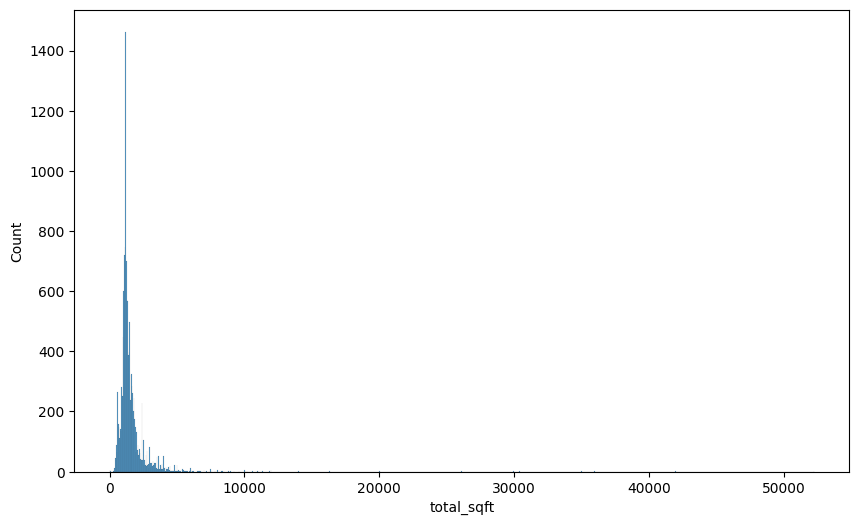

In [36]:
## Visualize the Outlier

import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df3.total_sqft)

In [37]:
df3.shape

(13200, 7)

In [38]:
## Remove the rows which has the total_sqft for one BHK is lessthan 300(a threshold)

df4 = df3[df3['total_sqft']/df3['BHK'] > 300]
df4.shape

(12274, 7)

<Axes: ylabel='Count'>

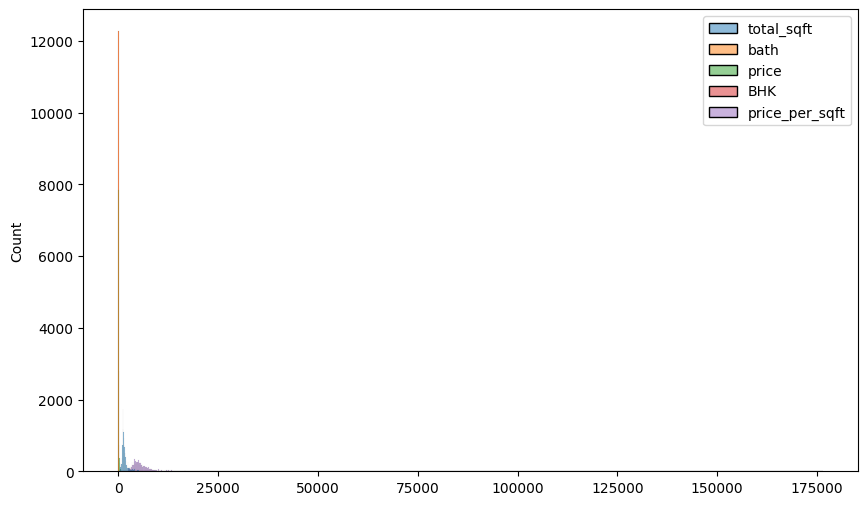

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(df4)

In [40]:
## when we consider the price_per_sqft

df4.price_per_sqft.describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
## It is imposible to have a price min price Rs. 267 so we have to remove those using sd method

mean = np.mean(df4.price_per_sqft)
std = np.std(df4.price_per_sqft)
mean - std

2158.8305408000597

In [42]:
def remove_outl(dataset):
    df_out = pd.DataFrame()
    for key, subdf in dataset.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5 = remove_outl(df4)

df5.shape

(9996, 7)

#### Check if a given location how does The prices look like for 2 BHK and 3 BHK property. 

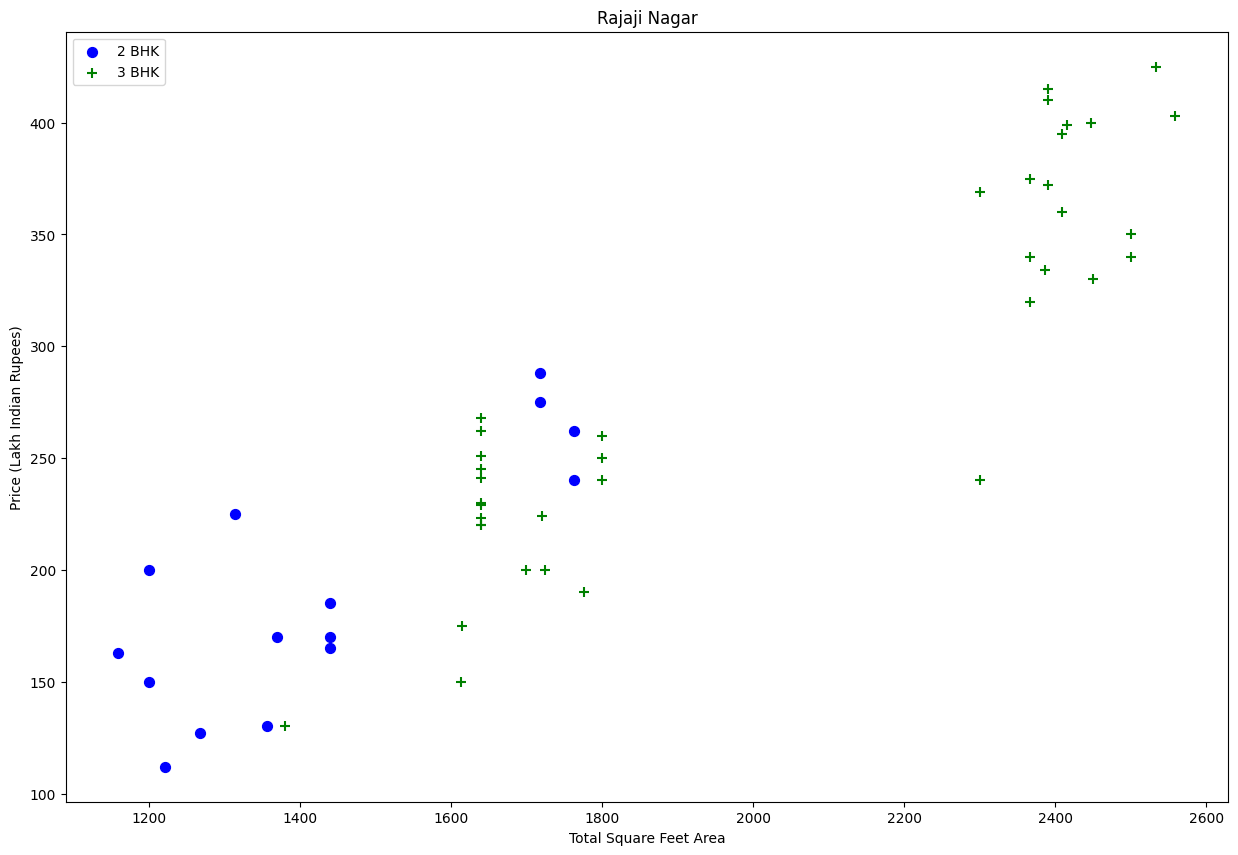

In [43]:
def plot_scatter_chart(dataset,location):
    bhk2 = dataset[(dataset.location==location) & (dataset.BHK==2)]
    bhk3 = dataset[(dataset.location==location) & (dataset.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

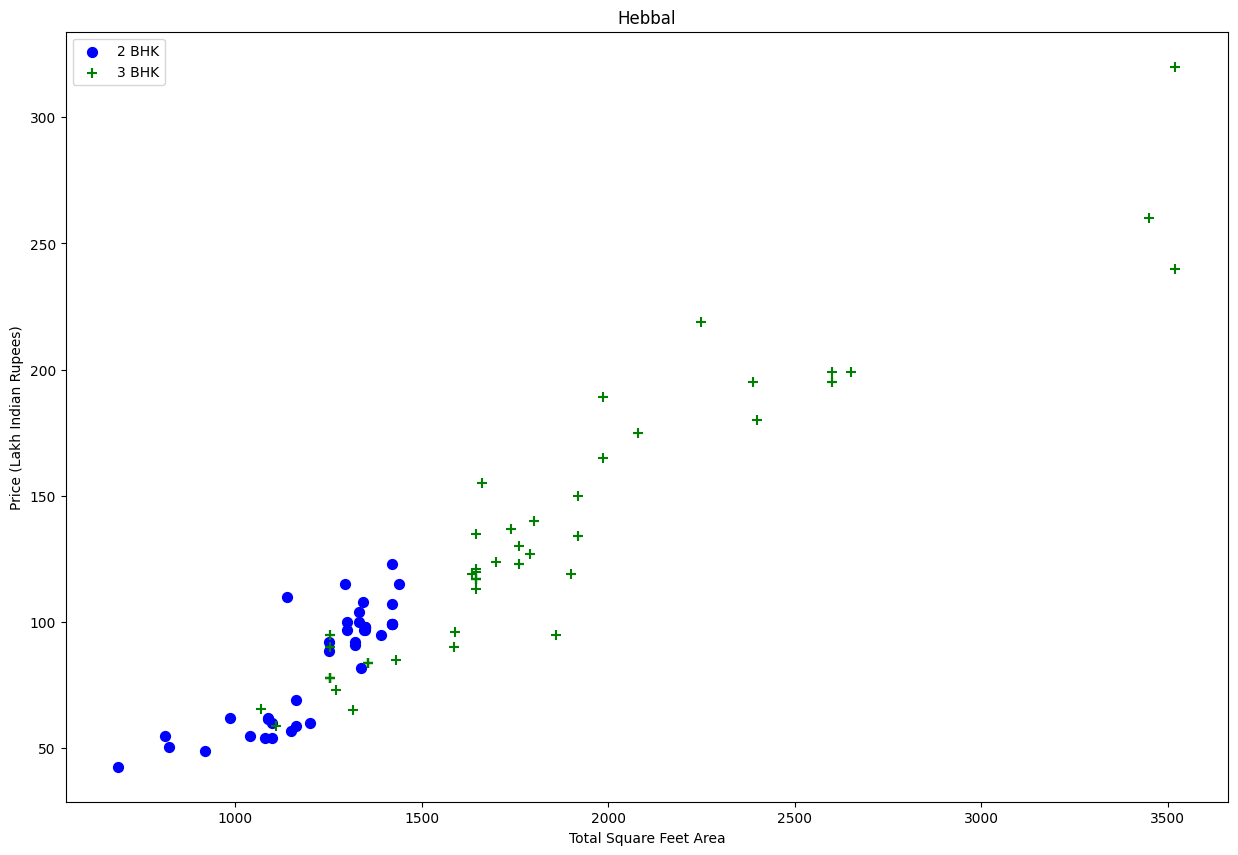

In [44]:
plot_scatter_chart(df5,"Hebbal")

In [45]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Block Koramangala,2 BHK,1415.0,2.0,110.0,2,7773.851590
8,1st Block Koramangala,2 BHK,860.0,2.0,65.5,2,7616.279070
9,1st Block Koramangala,4 BHK,3000.0,3.0,300.0,4,10000.000000


#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [46]:
def remove_bhk_outliers(dataset):
    exclude_indices = np.array([])
    for location, location_df in dataset.groupby('location'):
        bhk_stats = {}
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return dataset.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)

df6.shape

(7206, 7)

In [47]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [48]:
## checking bathroom(bath) with bedroom(BHK) in genral it is not possible to have a bathroom > bedroom so we can find that and remove

df7 = df6[~(df6.bath > df6.BHK + 1)]
df7.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [49]:
df6.shape

(7206, 7)

In [50]:
df7.shape

(7130, 7)

In [51]:
#df7.drop('price_per_sqft',axis=1,inplace=True)

In [52]:
df7.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [53]:
df7.location.unique()

array(['1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar',
       'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal',
       'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout',
       'BTM 1st Stage', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basapura',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billek

In [54]:
df7.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


Text(0, 0.5, 'Count')

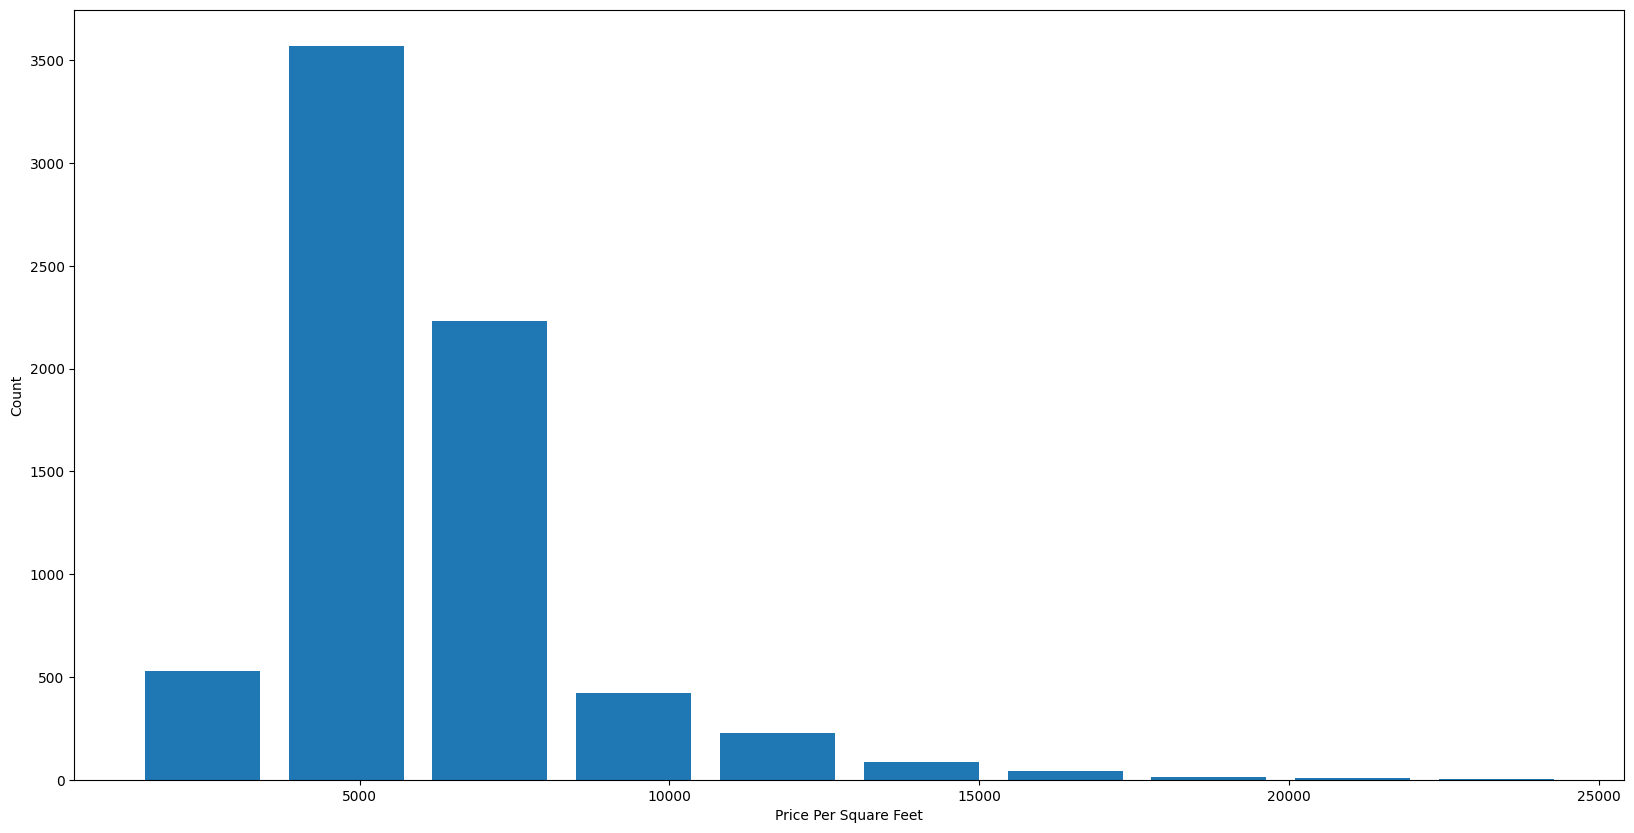

In [55]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [56]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

Text(0, 0.5, 'Count')

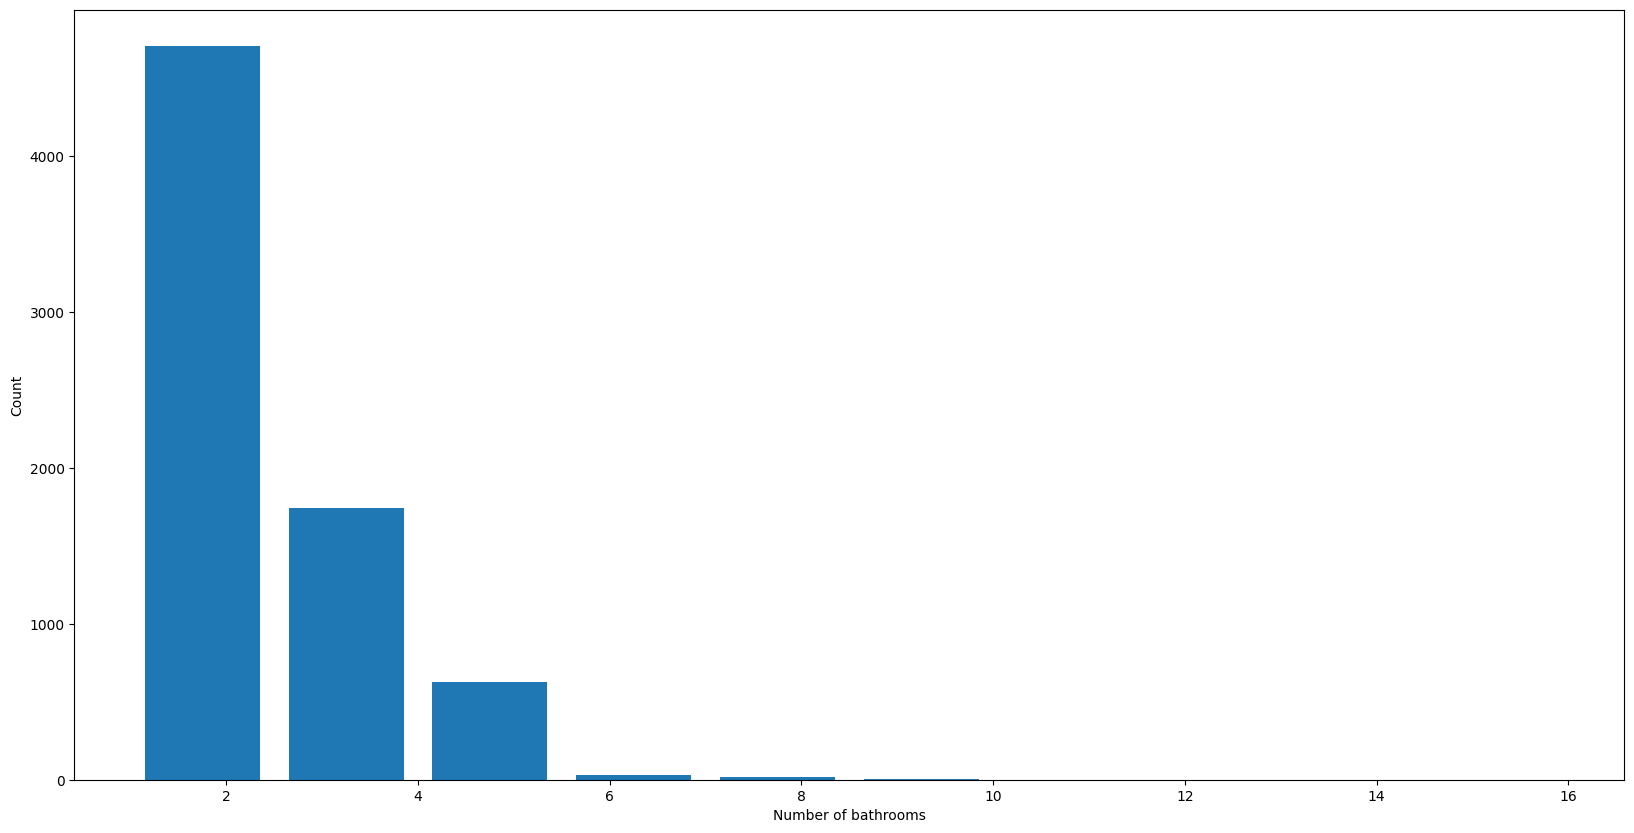

In [57]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [58]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
8450,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9126,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9433,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [59]:
df7[df7.bath>df7.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft


In [60]:
df8 = df7[df7.bath<df7.BHK+2]
df8.shape

(7130, 7)

In [61]:
df8.head(2)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [62]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [63]:
## Convert Gategorical DATA to numerical DATA using LabelEncoder() method

#from sklearn import preprocessing as prp

#loc = prp.LabelEncoder()

#loc.fit(df7.location.unique())

#df7['location'] = loc.transform(df7.location)


dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# FEATURE SELECTION

In [66]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
X.shape

(7130, 257)

In [68]:
y = df11.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [70]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8961622034644856

In [71]:
import sklearn
print(sklearn.__version__)

1.3.2


# CORRELATION

### Note : In this data set we don't want to find the Correlation between features because here there are only 4 features *(WE ONLY DO CHECK THE  CORRELATION FOR X_train, but if we want to remove then we should remove the respective X_test row also)* . corr() is useful when you have more columns(features) data

In [72]:
## calculate the correlation
corr_mat = X_train.corr()

In [73]:
corr_mat

,total_sqft,bath,BHK,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
total_sqft,1.000000,0.679816,0.673219,0.024935,0.017691,0.001467,-0.006951,0.000499,-0.004851,-0.007202,...,-0.006541,0.009770,-0.019783,-0.014699,0.101095,0.000231,0.000928,-0.036065,-0.006339,-0.026399
bath,0.679816,1.000000,0.893171,0.026580,0.014913,0.004593,-0.008421,0.022074,-0.008227,-0.007858,...,0.001155,0.051314,-0.011637,-0.029145,0.078415,-0.011410,0.007423,-0.048450,-0.006622,-0.030294
BHK,0.673219,0.893171,1.000000,0.037247,0.012990,-0.007362,0.006925,0.031997,-0.010003,-0.005517,...,-0.001123,0.052319,-0.014149,-0.035437,0.059530,0.000995,0.001742,-0.048310,-0.009178,-0.036834
1st Block Jayanagar,0.024935,0.026580,0.037247,1.000000,-0.001053,-0.001490,-0.001053,-0.000608,-0.000608,-0.001826,...,-0.002196,-0.000430,-0.000860,-0.002153,-0.005974,-0.001216,-0.003317,-0.001925,-0.000961,-0.002238
1st Block Koramangala,0.017691,0.014913,0.012990,-0.001053,1.000000,-0.001490,-0.001053,-0.000608,-0.000608,-0.001826,...,-0.002196,-0.000430,-0.000860,-0.002153,-0.005974,-0.001216,-0.003317,-0.001925,-0.000961,-0.002238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yelachenahalli,0.000231,-0.011410,0.000995,-0.001216,-0.001216,-0.001721,-0.001216,-0.000702,-0.000702,-0.002109,...,-0.002536,-0.000496,-0.000993,-0.002487,-0.006900,1.000000,-0.003831,-0.002223,-0.001110,-0.002585
Yelahanka,0.000928,0.007423,0.001742,-0.003317,-0.003317,-0.004694,-0.003317,-0.001915,-0.001915,-0.005752,...,-0.006918,-0.001354,-0.002708,-0.006783,-0.018822,-0.003831,1.000000,-0.006064,-0.003028,-0.007050
Yelahanka New Town,-0.036065,-0.048450,-0.048310,-0.001925,-0.001925,-0.002724,-0.001925,-0.001111,-0.001111,-0.003337,...,-0.004014,-0.000785,-0.001571,-0.003936,-0.010921,-0.002223,-0.006064,1.000000,-0.001757,-0.004091
Yelenahalli,-0.006339,-0.006622,-0.009178,-0.000961,-0.000961,-0.001360,-0.000961,-0.000555,-0.000555,-0.001667,...,-0.002004,-0.000392,-0.000785,-0.001965,-0.005453,-0.001110,-0.003028,-0.001757,1.000000,-0.002043


In [74]:
## Visualize the correlation using heatmap
#sns.heatmap(corr_mat,annot=True)#,cmap=plt.cm.CMRmap_r)
#plt.show()

# MODEL TRAINING

    * 1.Linear Regression Model

In [75]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8961622034644856

#### Measure accuracy of our LinearRegression model using K Fold cross validation. 

In [76]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87897097, 0.91569454, 0.8266927 , 0.81929389, 0.83101923])

#### Here 5 iterations we get a score above 85% all the time. This is good but we want to test other algorithms for regression to see if we can get even better score. *We will use GridSearchCV for this purpose*

In [77]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # No parameters initially
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and y are defined elsewhere
# Call the function
find_best_model_using_gridsearchcv(X, y)


c:\Users\rsibr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rsibr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rsibr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\rsibr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

,model,best_score,best_params
0,linear_regression,0.854334,{}
1,lasso,0.704082,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.726959,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [78]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1 

    return lr_clf.predict([x])[0]

In [79]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\rsibr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.47322714627774

<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [80]:
import pickle
with open('regmodel.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [81]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))